In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu

###**Importing libraries**

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

In [ ]:
import warnings
warnings.filterwarnings('ignore')

###**Data reading**

In [ ]:
#reading train data
df_train = pd.DataFrame()

df_train1 = pd.DataFrame()
df_train1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/1.csv")
df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train1], axis=0)

df_train0 = pd.DataFrame()
df_train0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/0.csv")
df_train0 = df_train0.drop(df_train0.columns[0], axis=1)  
df_train0["target"] = np.zeros(df_train0.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train0], axis=0)

#reading test data
df_test = pd.DataFrame()

df_test1 = pd.DataFrame()
df_test1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/1.csv")
df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
df_test1["target"] = np.ones(df_test1.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test1], axis=0)

df_test0 = pd.DataFrame()
df_test0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/0.csv")
df_test0 = df_test0.drop(df_test0.columns[0], axis=1)  
df_test0["target"] = np.zeros(df_test0.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test0], axis=0)

df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

###**Data pre-processing**

In [ ]:
X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [ ]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)

###**Final model training**

In [ ]:
def MLP2():

  model = Sequential()
  model.add(Dense(1000, activation='relu', input_shape=(500,)))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              501000    
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 1,504,002
Trainable params: 1,504,002
Non-trainable params: 0
_________________________________________________________________
None






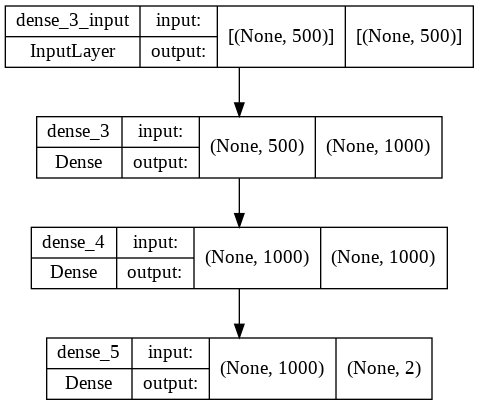

In [ ]:
mlp2 = MLP2()
print(mlp2.summary())
print('\n')
print('\n')
plot_model(mlp2, to_file='mlp2.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = mlp2.fit(X_train, Y_train, 
                   batch_size=32,
                   epochs=50, 
                   validation_data=[X_valid, Y_valid],
                   verbose=1)

Epoch 1/50
125/125 [==============================] - 1s 6ms/step - loss: 0.7041 - accuracy: 0.5362 - val_loss: 0.6756 - val_accuracy: 0.5760
Epoch 2/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6807 - accuracy: 0.5650 - val_loss: 0.6566 - val_accuracy: 0.5980
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6739 - accuracy: 0.5767 - val_loss: 0.6613 - val_accuracy: 0.5800
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6754 - accuracy: 0.5688 - val_loss: 0.6576 - val_accuracy: 0.5920
Epoch 5/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6686 - accuracy: 0.5792 - val_loss: 0.6519 - val_accuracy: 0.6020
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6669 - accuracy: 0.5943 - val_loss: 0.6501 - val_accuracy: 0.5980
Epoch 7/50
125/125 [==============================] - 1s 5ms/step - loss: 0.6623 - accuracy: 0.5950 - val_loss: 0.6513 - val_accuracy: 0.5920
Epoch 

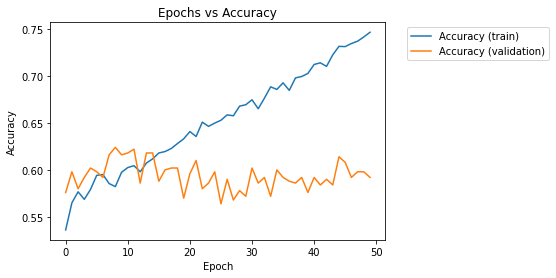

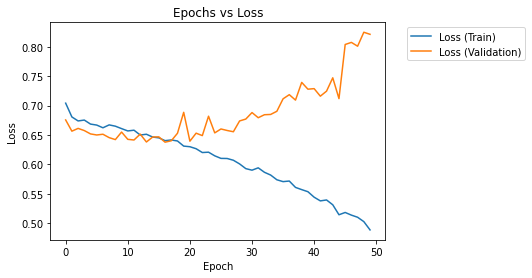

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###**Evaluation of model**

In [ ]:
Y_pred_train = np.argmax(mlp2.predict(X_train), axis=1)
Y_pred_test = np.argmax(mlp2.predict(X_test), axis=1)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2000
           1       0.77      0.74      0.76      2000

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       241
           1       0.60      0.55      0.58       258

    accuracy                           0.58       499
   macro avg       0.58      0.58      0.58       499
weighted avg       0.58      0.58      0.58       499



Train CM


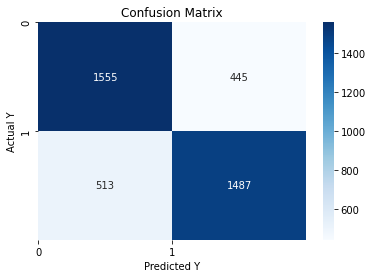





Test CM


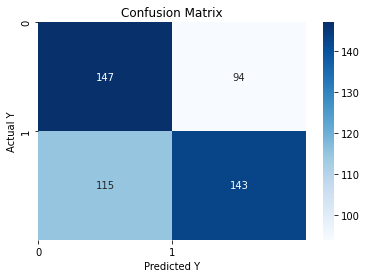

In [ ]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()